# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [2]:
data = pd.read_csv('./Data/breast-cancer-wisconsin-data.csv')

In [3]:
data.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [6]:
data.shape

(699, 11)

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [7]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [8]:
data.isnull().any(), data.isna().any()

(ID                             False
 ClumpThickness                 False
 Cell Size                      False
 Cell Shape                     False
 Marginal Adhesion              False
 Single Epithelial Cell Size    False
 Bare Nuclei                    False
 Normal Nucleoli                False
 Bland Chromatin                False
 Mitoses                        False
 Class                          False
 dtype: bool, ID                             False
 ClumpThickness                 False
 Cell Size                      False
 Cell Shape                     False
 Marginal Adhesion              False
 Single Epithelial Cell Size    False
 Bare Nuclei                    False
 Normal Nucleoli                False
 Bland Chromatin                False
 Mitoses                        False
 Class                          False
 dtype: bool)

In [9]:
data.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


There are 698 entries for all columns; So there are no missing (Null or NA) values.

10 out of 11 columns are integer types and all 10 can be computed.

Bare Nuclei is of object type. Will check if that contains ? or not.

In [10]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?

In [11]:
data.loc[data['Bare Nuclei'] == '?'].shape

(16, 11)

There are 16 rows with Bare Nuclei = ?

In [12]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

Here, we will first convert Bare Nuclei column to integer, get the mean of all values and assign this mean where ? is occuring

In [13]:
data.loc[data['Bare Nuclei'] != '?', 'Bare Nuclei'] = pd.to_numeric(data.loc[data['Bare Nuclei'] != '?', 'Bare Nuclei'])

In [14]:
bareNuclei = data.loc[data['Bare Nuclei'] != '?', 'Bare Nuclei']

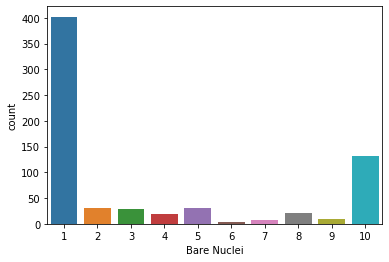

In [15]:
sns.countplot(bareNuclei)

In [ ]:
bareNuclei.value_counts()

From the countplot and unique values, value of 1 is repeated for 402 times.

So, we will assign mode value of 1 to the rows where ? is occuring

In [16]:
#data.replace(to_replace='?', value=bareNuclei.mode(), inplace=True)

In [17]:
data.loc[data['Bare Nuclei'] == '?', 'Bare Nuclei'] = pd.to_numeric(bareNuclei.mode()[0])

In [18]:
data.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.486409,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.621929,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


Check if there are any duplicate rows (ID)

In [19]:
duplicateRows = data[data.duplicated(['ID'])]
duplicateRows.shape

(54, 11)

Dropping these duplicate rows

In [20]:
data.drop_duplicates(keep='first', inplace=True)

In [21]:
data.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.900000e+02,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,1.073826e+06,4.428986,3.133333,3.204348,2.827536,3.213043,3.482609,3.436232,2.885507,1.594203,2.689855
std,6.196092e+05,2.817378,3.042451,2.960844,2.867787,2.200964,3.617064,2.444060,3.067682,1.724230,0.951379
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.744845e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171752e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238450e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


Removing ID for further analysis

In [22]:
data.drop(columns='ID', inplace=True)

In [ ]:
# Check for correlation of variable

In [23]:
data.corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.643173,0.653589,0.487715,0.517253,0.590648,0.561063,0.535507,0.350196,0.716812
Cell Size,0.643173,1.000000,0.905349,0.712933,0.746982,0.684571,0.759632,0.727073,0.459918,0.817586
Cell Shape,0.653589,0.905349,1.000000,0.690782,0.714243,0.704165,0.738576,0.724519,0.440435,0.817551
Marginal Adhesion,0.487715,0.712933,0.690782,1.000000,0.608281,0.672512,0.669860,0.602228,0.417008,0.701175
Single Epithelial Cell Size,0.517253,0.746982,0.714243,0.608281,1.000000,0.580487,0.620526,0.633880,0.482517,0.681063
Bare Nuclei,0.590648,0.684571,0.704165,0.672512,0.580487,1.000000,0.672754,0.578161,0.342823,0.816655
Normal Nucleoli,0.561063,0.759632,0.738576,0.669860,0.620526,0.672754,1.000000,0.669099,0.343769,0.756736
Bland Chromatin,0.535507,0.727073,0.724519,0.602228,0.633880,0.578161,0.669099,1.000000,0.427490,0.715363
Mitoses,0.350196,0.459918,0.440435,0.417008,0.482517,0.342823,0.343769,0.427490,1.000000,0.423947
Class,0.716812,0.817586,0.817551,0.701175,0.681063,0.816655,0.756736,0.715363,0.423947,1.000000


In [24]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [25]:
#Let us check for pair plots

C:\Install\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Install\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


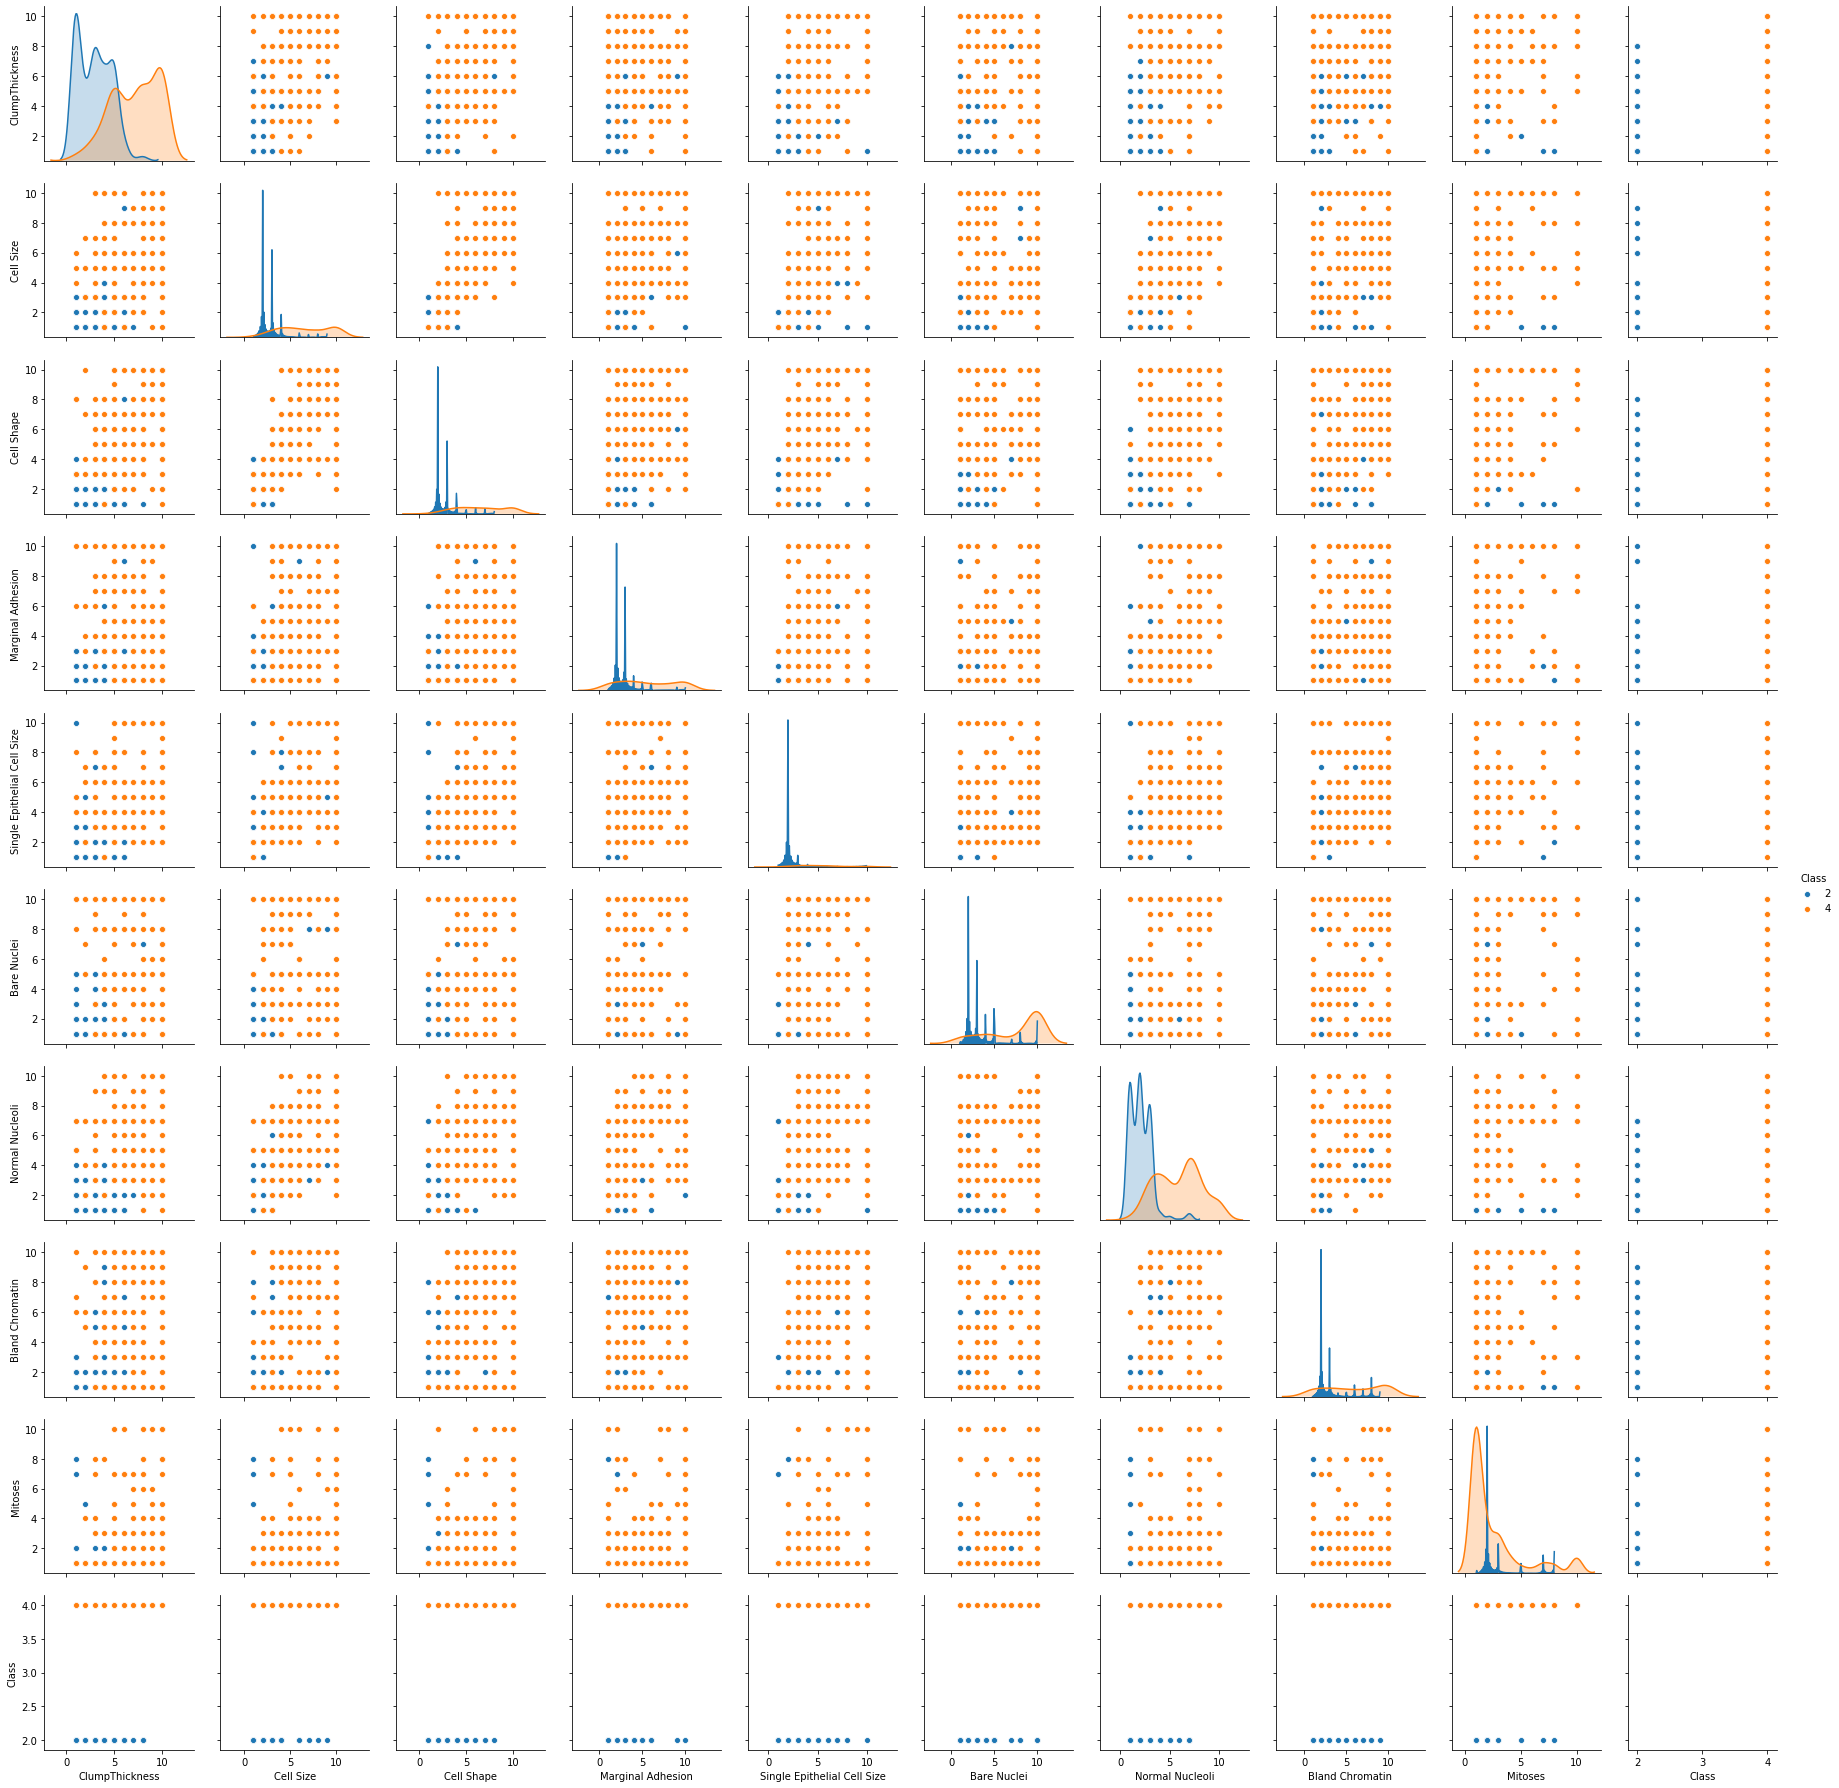

In [26]:
sns.pairplot(data, hue='Class')

#### Inferences from the pairplot:
- Almost all variables have good separation across Class and so are good candidates for the clustering
- Distributions of most variables are right-skewed, which means, most values are concentrated on lower side
- Except Mitoses, all variabels are having correlation > 0.5 with other variables
- Mitoses is having correlation < 0.5 with other variables

In [27]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

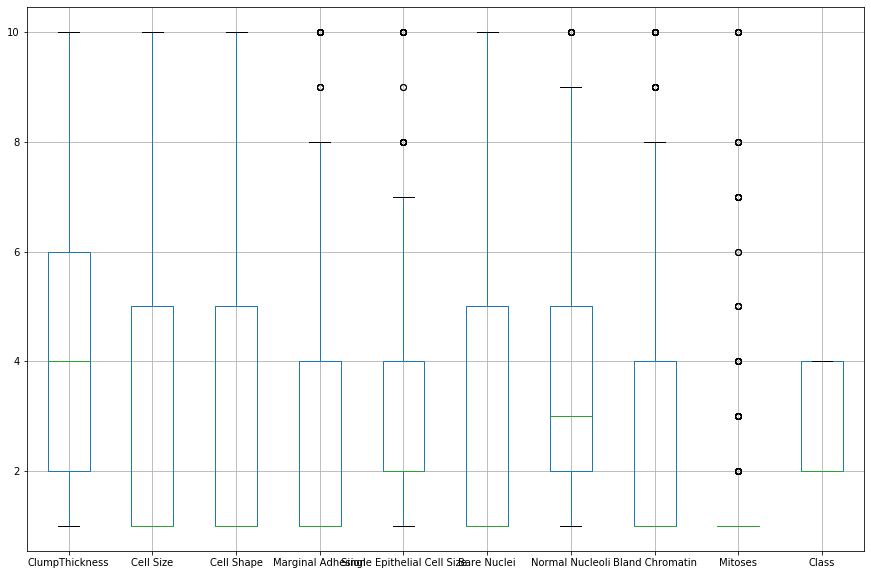

In [28]:
data.boxplot(figsize=(15, 10))

Based on above boxplot, most of the outliers are on higher side on the range of 1 to 10.

Choosing these columns to process the outliers:
Marginal Adhesion
Single Epithelial Cell Size
Normal Nucleoli
Bland Chromatin
Mitoses

The outliers are assigned the values to the nearest quartile range (instead of mean or mode of all columns)'

In [29]:
data.loc[data['Marginal Adhesion'] > 8, 'Marginal Adhesion'] = 8

In [30]:
data.loc[data['Single Epithelial Cell Size'] > 7, 'Single Epithelial Cell Size'] = 7

In [31]:
data.loc[data['Normal Nucleoli'] > 9, 'Normal Nucleoli'] = 9

In [32]:
data.loc[data['Bland Chromatin'] > 8, 'Bland Chromatin'] = 8

In [33]:
data.loc[data['Mitoses'] > 1, 'Mitoses'] = 1

In [34]:
data.describe()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.0,690.000000
mean,4.428986,3.133333,3.204348,2.660870,3.047826,3.482609,3.407246,2.685507,1.0,2.689855
std,2.817378,3.042451,2.960844,2.478542,1.769530,3.617064,2.370771,2.635240,0.0,0.951379
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.0,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.0,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.0,4.000000
max,10.000000,10.000000,10.000000,8.000000,7.000000,10.000000,9.000000,8.000000,1.0,4.000000


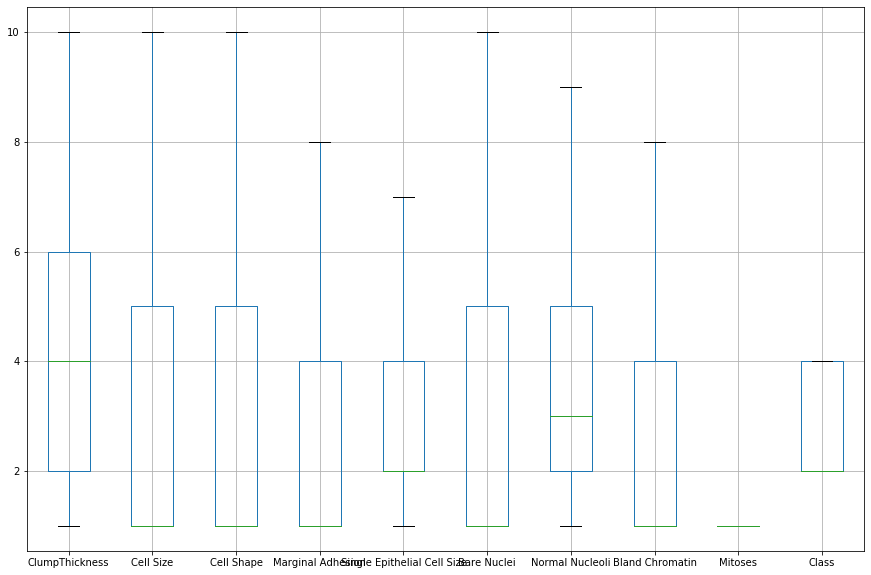

In [35]:
data.boxplot(figsize=(15, 10))

We could that see most of the outliers are now removed.

In [36]:
sc = StandardScaler()

In [37]:
X = data.drop(columns='Class')

In [38]:
y = data['Class']

In [39]:
X_sc = sc.fit_transform(X)

# Q6 Create a covariance matrix for identifying Principal components

In [40]:
# PCA
# Step 1 - Create covariance matrix

In [41]:
cov_matrix = np.cov(X_sc.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.00145138 0.64410677 0.65453792 0.50566766 0.54660373 0.59150555
  0.56762194 0.54895554 0.        ]
 [0.64410677 1.00145138 0.9066632  0.73190433 0.78174972 0.68556472
  0.76060761 0.7322064  0.        ]
 [0.65453792 0.9066632  1.00145138 0.70664526 0.75160088 0.70518656
  0.73975369 0.72768806 0.        ]
 [0.50566766 0.73190433 0.70664526 1.00145138 0.66784054 0.68919517
  0.68896322 0.6334195  0.        ]
 [0.54660373 0.78174972 0.75160088 0.66784054 1.00145138 0.6263289
  0.66056222 0.68990315 0.        ]
 [0.59150555 0.68556472 0.70518656 0.68919517 0.6263289  1.00145138
  0.68161737 0.60106392 0.        ]
 [0.56762194 0.76060761 0.73975369 0.68896322 0.66056222 0.68161737
  1.00145138 0.6803516  0.        ]
 [0.54895554 0.7322064  0.72768806 0.6334195  0.68990315 0.60106392
  0.6803516  1.00145138 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]]


# Q7 Identify eigen values and eigen vector

In [42]:
# Step 2- Get eigen values and eigen vector

In [43]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [44]:
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 0.30799679 -0.88855863 -0.00115266  0.05182637  0.19731942 -0.26631535
  -0.02340462  0.05007625  0.        ]
 [ 0.38632446  0.04486697 -0.73943418  0.19756566 -0.34955138  0.03868533
  -0.20289405 -0.31320367  0.        ]
 [ 0.38305998 -0.02112671  0.65853186  0.16859924 -0.52512896  0.11953191
  -0.17281745 -0.26611016  0.        ]
 [ 0.34656129  0.33312259  0.05684034 -0.42387996  0.03652014 -0.73667336
  -0.19357909  0.06727064  0.        ]
 [ 0.35338061  0.21633291  0.07824581  0.3339381   0.57169387  0.26208414
  -0.51592101  0.22133388  0.        ]
 [ 0.34279211 -0.08446144 -0.0792238  -0.6516513  -0.14992364  0.51277586
   0.03050267  0.39760207  0.        ]
 [ 0.35647419  0.12116092  0.05896917 -0.15516848  0.44187298  0.14884046
   0.51600916 -0.58908479  0.        ]
 [ 0.34582304  0.16858195 -0.02155318  0.43582173 -0.13123266 -0.12970504
   0.59797754  0.51957568  0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.       

# Q8 Find variance and cumulative variance by each eigen vector

In [46]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained:")
print(cum_var_exp)

Cumulative Variance Explained:
[ 71.78603898  78.48270738  84.12158678  88.34908082  92.15324148
  95.72508426  98.87484419 100.         100.        ]


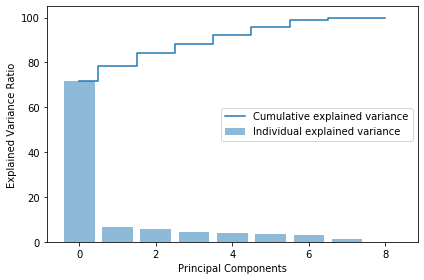

In [47]:
#plt.figure(figsize=(6, 4))
plt.bar(range(9), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(9), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

We will be taking 4 Principal Components which is explaining 88% of variance

In [48]:
pca = PCA(n_components=4)

In [49]:
X_reduced = pca.fit_transform(X_sc)

In [50]:
print('These are the transformed features:')
X_reduced

These are the transformed features:


array([[-1.45389231, -0.61826293,  0.02794098, -0.20951456],
       [ 1.85955123,  0.40801342, -0.80358543,  1.63437454],
       [-1.57785207, -0.01040327, -0.1891672 , -0.23458018],
       ...,
       [ 3.99536572,  0.98811752,  2.19806797, -0.16353707],
       [ 2.43714359,  0.84764399,  0.31840765, -1.39997342],
       [ 2.86804471,  0.93880135, -0.06121041, -0.4675035 ]])

In [51]:
print('These are the transformed components:')
pca.components_

These are the transformed components:


array([[ 0.30799679,  0.38632446,  0.38305998,  0.34656129,  0.35338061,
         0.34279211,  0.35647419,  0.34582304, -0.        ],
       [-0.88855863,  0.04486697, -0.02112671,  0.33312259,  0.21633291,
        -0.08446144,  0.12116092,  0.16858195, -0.        ],
       [ 0.05182637,  0.19756566,  0.16859924, -0.42387996,  0.3339381 ,
        -0.6516513 , -0.15516848,  0.43582173, -0.        ],
       [ 0.02340462,  0.20289405,  0.17281745,  0.19357909,  0.51592101,
        -0.03050267, -0.51600916, -0.59797754,  0.        ]])

In [52]:
pc = pca.explained_variance_

In [53]:
np.cumsum(pc)

array([5.75121822, 6.28772924, 6.73949433, 7.0781847 ])

# Q10 Find correlation between components and features

In [54]:
corr_comp_feature = pd.DataFrame(pca.components_, columns = list(X.columns))

In [55]:
corr_comp_feature

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.307997,0.386324,0.383060,0.346561,0.353381,0.342792,0.356474,0.345823,-0.0
1,-0.888559,0.044867,-0.021127,0.333123,0.216333,-0.084461,0.121161,0.168582,-0.0
2,0.051826,0.197566,0.168599,-0.423880,0.333938,-0.651651,-0.155168,0.435822,-0.0
3,0.023405,0.202894,0.172817,0.193579,0.515921,-0.030503,-0.516009,-0.597978,0.0


# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [56]:
ratings_data = pd.read_csv('./Data/jokes.csv')

In [57]:
ratings_data.shape

(24983, 101)

In [58]:
ratings_data.columns

Index(['NumJokes', 'Joke1', 'Joke2', 'Joke3', 'Joke4', 'Joke5', 'Joke6',
       'Joke7', 'Joke8', 'Joke9',
       ...
       'Joke91', 'Joke92', 'Joke93', 'Joke94', 'Joke95', 'Joke96', 'Joke97',
       'Joke98', 'Joke99', 'Joke100'],
      dtype='object', length=101)

The headers are already given in the dataset

# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [59]:
ratings = ratings_data.iloc[0:200, 1:]

In [60]:
ratings.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q13 Change the column indices from 0 to 99

In [61]:
ratings.columns = range(100)

In [62]:
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q14 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [63]:
ratings.replace(to_replace=99.00, value=0, inplace=True)

# Q15 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

If we do the direct scaling of ratings data, it will compute the mean as zero for all jokes.

We will be doing the scaling across users (rowwise), so that every joke will have scaled ratings for every user

In [64]:
ratings_diff = pd.DataFrame(sc.fit_transform(ratings.T).T)

In [65]:
ratings_diff.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.927207,1.989411,-1.250300,-0.986909,-0.874529,-1.046611,-1.283663,1.178166,-1.130896,-0.389889,...,0.941114,0.445939,0.445939,0.445939,0.445939,0.445939,-0.542656,0.445939,0.445939,0.445939
1,0.274579,-0.625106,0.743980,0.334284,-1.055391,-2.554180,-0.715693,-1.664789,1.262792,1.332790,...,0.015173,-1.584496,-0.625106,1.052797,-0.604519,-1.005980,0.064584,-0.495403,-1.454794,-0.345113
2,-0.787867,-0.787867,-0.787867,-0.787867,1.257275,1.311631,1.257275,1.311631,-0.787867,-0.787867,...,-0.787867,-0.787867,-0.787867,1.268600,-0.787867,-0.787867,-0.787867,-0.787867,-0.787867,-0.787867
3,-0.347962,1.929242,-0.347962,-0.347962,0.142932,1.877425,-1.117030,1.345623,-0.347962,0.153841,...,-0.347962,-0.347962,-0.347962,-0.203421,-0.347962,-0.347962,-0.347962,-0.347962,-0.347962,-0.347962
4,1.306203,0.389048,-1.681034,-1.968676,-0.377212,-0.320627,0.961975,0.389048,-0.801603,0.653113,...,0.525796,0.617747,0.308885,0.525796,0.653113,-0.332416,0.035389,0.846447,-0.273472,-0.320627


### Popularity based recommendation system

# Q16  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [66]:
print('These are the index of the top 10 jokes with highest ratings:')
list(np.argsort(ratings_diff.mean())[::-1][:10])

These are the index of the top 10 jokes with highest ratings:


[49, 35, 52, 34, 28, 26, 61, 48, 31, 30]

In [67]:
print('These are the top 10 highest ratings:')
np.sort(ratings_diff.mean())[::-1][:10]

These are the top 10 highest ratings:


array([0.87821678, 0.75197178, 0.73670016, 0.69230389, 0.6642304 ,
       0.60972362, 0.55754984, 0.5320071 , 0.52189075, 0.50249102])